** Testing with the games from the entire season ** <br>


# Imports 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from __future__ import print_function
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import division
pd.set_option('display.width',5000)

from sklearn import linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation
from sklearn import metrics
from sklearn.metrics import confusion_matrix

/Users/vicky/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Load and Prep Data

#### Loading

In [2]:
carddata = pd.read_csv('AllSeason.csv').drop('Unnamed: 0',1)

In [3]:
carddata['hitter.last_name'].value_counts()

Carpenter    586
Fowler       561
Martinez     549
DeJong       541
Ozuna        514
Pham         465
Molina       457
Wong         375
Bader        265
Gyorko       186
García       168
Munoz         74
Wacha         59
Martínez      57
Weaver        55
Peña          54
Mikolas       51
Name: hitter.last_name, dtype: int64

In [4]:
##Selecting out final inputs. 
carddata_input = carddata.filter(items = [
       'hitter.last_name', 
       'pitcher.pitch_type',
       'pitcher.pitch_zone',  
    'hit_type'])   

In [5]:
carddata_input = carddata_input[carddata_input['hitter.last_name'] != 'Martínez'] 

In [6]:
carddata_input.to_csv('pitchpredict')

#### Creating Dummy variables

In [53]:
carddata_dum = pd.get_dummies(carddata_input, columns= ['hitter.last_name','pitcher.pitch_type'])

In [54]:
carddata_dum['hit_type'].value_counts()

0     4153
GB     362
FB     202
LD     192
PU      51
Name: hit_type, dtype: int64

In [55]:
carddata_dum.to_csv('pitchpredict')

#### Creating binary result (assigning all hit types to "1"). 

In [7]:
## Combining all types of contact
mapper = {'0': 0, 'FB': 1 , 'LD': 1, 'PU':1, 'GB': 1}

#### Split into X&y (input and predicted target)

In [57]:
y = carddata_dum['hit_type'] 
X = carddata_dum.drop('hit_type',1)

In [58]:
y2 = y.map(mapper)
y2.value_counts()

0    4153
1     807
Name: hit_type, dtype: int64

#### Train - Test - Split

In [59]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, stratify = y)

In [61]:
len(Y_test)

1488

Type of pitches: <br>
- CH = Changeup
- CT = Cutter
- CU = Curveball
- FA = Fastball
- SI = Fast ball (Sinker)
- SL = Slider
- SP = Splitter


Additional Possible Pitch types (but none in my sample, so unable to train on these):
- KN = Knuckleball
- SC = Screwball
- FO = Forkball
- IB = Intentional Ball
- PI = Pitchout

# Predicting Binary Outcome (Hit/Put in Play)

Random Forests

## Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
def quick_test(model, X, y):
    model.fit(X_train, Y_train)
    return model.score(X_test, Y_test)
    

def quick_test_afew_times(model, X, y, n=10):
    print( np.mean([quick_test(model, X, y) for j in range(n)]))

In [132]:
RF = RandomForestClassifier(n_estimators=10, class_weight = {0:1, 1:6})
RF.fit(X_train,Y_train)
RF.score(X_test, Y_test)

quick_test_afew_times(RF, X_train, Y_train)

0.7200531208499336


#### Classification Error Testing

In [28]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def train_score(classifier,X_train, Y_train, X_test, Y_test):
    clf = classifier.fit(X_train, Y_train)
    # accuracy for test & train:
    train_acc=clf.score(X_train, Y_train)
    test_acc=clf.score(X_test,Y_test)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = Y_test
    y_pred = clf.predict(X_test)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    #In this instance, 1 stands for people who died. 
    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

Training Data Accuracy: 0.78
Test Data Accuracy:     0.72
[[953 307]
 [120 126]]


Precision:              0.89
Recall:                 0.76


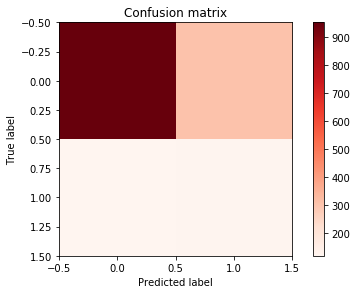

In [133]:
train_score(RF,X_train,Y_train,X_test,Y_test)

In [134]:
y_pred = RF.predict(X_test)

In [135]:
metrics.precision_score(Y_test, y_pred, average='weighted')

0.7906181729693132

In [136]:
metrics.recall_score(Y_test, y_pred, average='weighted')

0.7164674634794157

In [137]:
confusion_matrix(Y_test, y_pred)

array([[953, 307],
       [120, 126]])

In [21]:
X_test

,pitcher.pitch_zone,hitter.last_name_Bader,hitter.last_name_Carpenter,hitter.last_name_DeJong,hitter.last_name_Fowler,hitter.last_name_García,hitter.last_name_Gyorko,hitter.last_name_Martinez,hitter.last_name_Martínez,hitter.last_name_Mikolas,...,hitter.last_name_Wacha,hitter.last_name_Weaver,hitter.last_name_Wong,pitcher.pitch_type_CH,pitcher.pitch_type_CT,pitcher.pitch_type_CU,pitcher.pitch_type_FA,pitcher.pitch_type_SI,pitcher.pitch_type_SL,pitcher.pitch_type_SP
3153,11.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2984,11.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2599,11.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3977,12.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2327,11.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4396,11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3507,11.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
286,7.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
971,12.0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
2905,11.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
RF.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.82027638, 0.17972362],
       [1.        , 0.        ],
       ...,
       [0.25568182, 0.74431818],
       [0.9       , 0.1       ],
       [0.24431231, 0.75568769]])

## Log Regression

#### Seeing how it will do training on the whole set

In [278]:
from sklearn.linear_model import LogisticRegression

In [279]:
LRall = LogisticRegression(class_weight = {0:1,1:5})
LRall.fit(X,y)
LRall.score(X, y)

quick_test_afew_times(LRall, X, y)


0.7002688172043011


In [182]:
y_predLRall = LRall.predict(X)
metrics.confusion_matrix(y, y_predLRall)

array([[2898, 1301],
       [ 303,  515]])

#### Seeing how it will do T-T-S

In [183]:
LR = LogisticRegression(class_weight = {0:1,1:5})
LR.fit(X_train,Y_train)
LR.score(X_test, Y_test)

quick_test_afew_times(LR, X_train, Y_train)

0.6759628154050465


In [184]:
y_predLR = LR.predict(X_test)

In [186]:
metrics.confusion_matrix(Y_test, y_predLR)

array([[865, 395],
       [ 93, 153]])

#### Predict Proba Exploration

** Practicing Predic_proba for the purposes of the flask app.** 

In [215]:
score = LR.predict_proba(X_test)

In [216]:
score

array([[0.68174696, 0.31825304],
       [0.65038304, 0.34961696],
       [0.60811309, 0.39188691],
       ...,
       [0.14598361, 0.85401639],
       [0.31630842, 0.68369158],
       [0.49108751, 0.50891249]])

In [224]:
results = {"score": score[0,0]}

In [226]:
#### If the proba that it will be a hit is over 50% it will predict hit. 
results

{'score': 0.681746958655565}

In [221]:
LR.predict(X_test)

array([0, 0, 0, ..., 1, 1, 1])

#### Format for Flask App exploration

In [295]:
trying = [{"pitcher.pitch_zone":10.0,"hitter.last_name_Bader":1,"hitter.last_name_Carpenter":0,"hitter.last_name_DeJong":0,"hitter.last_name_Fowler":0,"hitter.last_name_Garc\\u00eda":0,"hitter.last_name_Gyorko":0,"hitter.last_name_Martinez":0,"hitter.last_name_Mikolas":0,"hitter.last_name_Molina":0,"hitter.last_name_Munoz":0,"hitter.last_name_Ozuna":0,"hitter.last_name_Pe\\u00f1a":0,"hitter.last_name_Pham":0,"hitter.last_name_Wacha":0,"hitter.last_name_Weaver":0,"hitter.last_name_Wong":0,"pitcher.pitch_type_CH":1,"pitcher.pitch_type_CT":0,"pitcher.pitch_type_CU":0,"pitcher.pitch_type_FA":0,"pitcher.pitch_type_SI":0,"pitcher.pitch_type_SL":0,"pitcher.pitch_type_SP":0}]

In [396]:
data= {"example": [14.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]}

trying2 = np.matrix(data["example"])

In [397]:
trying2

matrix([[14.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [398]:
LR.predict_proba(trying2)

array([[0.80821791, 0.19178209]])

In [290]:
p = X_test.to_json(orient = 'records')

## Catboost

#### New X and Y that aren't dummified

In [8]:
ycat = carddata_input['hit_type'] 
Xcat = carddata_input.drop('hit_type',1)

In [9]:
ycat2 = ycat.map(mapper)

#### New T-T-S

In [26]:
X_trainc, X_testc, y_trainc, y_testc = train_test_split(Xcat, ycat2, test_size=0.3, random_state=42, stratify = ycat2)

In [27]:
from catboost import CatBoostRegressor, CatBoostClassifier, Pool

categorical_features_indices = np.where(X_trainc.dtypes != np.float)[0]
train_pool = Pool(X_trainc, y_trainc, cat_features=categorical_features_indices)

Catset=CatBoostClassifier(loss_function = 'Logloss', class_weights = [1,4])
Cat = Catset.fit(X_trainc, y_trainc, cat_features=categorical_features_indices);

0:	learn: 0.6874085	total: 21.9ms	remaining: 21.9s
1:	learn: 0.6816234	total: 45.8ms	remaining: 22.8s
2:	learn: 0.6763999	total: 68.1ms	remaining: 22.6s
3:	learn: 0.6715431	total: 80ms	remaining: 19.9s
4:	learn: 0.6669390	total: 89.8ms	remaining: 17.9s
5:	learn: 0.6627330	total: 96.9ms	remaining: 16.1s
6:	learn: 0.6584311	total: 109ms	remaining: 15.5s
7:	learn: 0.6550480	total: 127ms	remaining: 15.7s
8:	learn: 0.6515609	total: 135ms	remaining: 14.8s
9:	learn: 0.6486289	total: 143ms	remaining: 14.2s
10:	learn: 0.6455965	total: 151ms	remaining: 13.6s
11:	learn: 0.6425139	total: 161ms	remaining: 13.2s
12:	learn: 0.6401661	total: 168ms	remaining: 12.8s
13:	learn: 0.6374332	total: 176ms	remaining: 12.4s
14:	learn: 0.6349751	total: 184ms	remaining: 12.1s
15:	learn: 0.6321403	total: 193ms	remaining: 11.9s
16:	learn: 0.6299879	total: 202ms	remaining: 11.7s
17:	learn: 0.6279853	total: 210ms	remaining: 11.4s
18:	learn: 0.6261491	total: 216ms	remaining: 11.2s
19:	learn: 0.6244279	total: 238ms	rem

172:	learn: 0.5751992	total: 2.18s	remaining: 10.4s
173:	learn: 0.5751992	total: 2.21s	remaining: 10.5s
174:	learn: 0.5751957	total: 2.23s	remaining: 10.5s
175:	learn: 0.5751925	total: 2.24s	remaining: 10.5s
176:	learn: 0.5751920	total: 2.24s	remaining: 10.4s
177:	learn: 0.5751920	total: 2.25s	remaining: 10.4s
178:	learn: 0.5751900	total: 2.26s	remaining: 10.3s
179:	learn: 0.5747970	total: 2.27s	remaining: 10.3s
180:	learn: 0.5747924	total: 2.27s	remaining: 10.3s
181:	learn: 0.5747870	total: 2.28s	remaining: 10.3s
182:	learn: 0.5747802	total: 2.29s	remaining: 10.2s
183:	learn: 0.5747216	total: 2.29s	remaining: 10.2s
184:	learn: 0.5747196	total: 2.3s	remaining: 10.1s
185:	learn: 0.5744270	total: 2.31s	remaining: 10.1s
186:	learn: 0.5743467	total: 2.32s	remaining: 10.1s
187:	learn: 0.5740146	total: 2.32s	remaining: 10s
188:	learn: 0.5740053	total: 2.33s	remaining: 10s
189:	learn: 0.5740050	total: 2.34s	remaining: 9.97s
190:	learn: 0.5740035	total: 2.34s	remaining: 9.93s
191:	learn: 0.573

338:	learn: 0.5621027	total: 3.67s	remaining: 7.16s
339:	learn: 0.5616931	total: 3.68s	remaining: 7.15s
340:	learn: 0.5616883	total: 3.69s	remaining: 7.14s
341:	learn: 0.5612993	total: 3.72s	remaining: 7.16s
342:	learn: 0.5612950	total: 3.74s	remaining: 7.16s
343:	learn: 0.5608847	total: 3.75s	remaining: 7.14s
344:	learn: 0.5606353	total: 3.75s	remaining: 7.13s
345:	learn: 0.5604930	total: 3.76s	remaining: 7.11s
346:	learn: 0.5604919	total: 3.77s	remaining: 7.09s
347:	learn: 0.5596221	total: 3.77s	remaining: 7.07s
348:	learn: 0.5596220	total: 3.78s	remaining: 7.05s
349:	learn: 0.5589685	total: 3.79s	remaining: 7.04s
350:	learn: 0.5589663	total: 3.79s	remaining: 7.02s
351:	learn: 0.5587460	total: 3.8s	remaining: 7s
352:	learn: 0.5583757	total: 3.81s	remaining: 6.98s
353:	learn: 0.5580147	total: 3.82s	remaining: 6.97s
354:	learn: 0.5580146	total: 3.83s	remaining: 6.95s
355:	learn: 0.5575963	total: 3.83s	remaining: 6.94s
356:	learn: 0.5575741	total: 3.84s	remaining: 6.92s
357:	learn: 0.55

508:	learn: 0.5386678	total: 5.16s	remaining: 4.98s
509:	learn: 0.5384673	total: 5.17s	remaining: 4.97s
510:	learn: 0.5384657	total: 5.18s	remaining: 4.96s
511:	learn: 0.5384652	total: 5.19s	remaining: 4.94s
512:	learn: 0.5381079	total: 5.2s	remaining: 4.93s
513:	learn: 0.5380462	total: 5.2s	remaining: 4.92s
514:	learn: 0.5380444	total: 5.21s	remaining: 4.91s
515:	learn: 0.5380432	total: 5.22s	remaining: 4.89s
516:	learn: 0.5377626	total: 5.22s	remaining: 4.88s
517:	learn: 0.5374293	total: 5.23s	remaining: 4.87s
518:	learn: 0.5374066	total: 5.24s	remaining: 4.86s
519:	learn: 0.5373548	total: 5.25s	remaining: 4.84s
520:	learn: 0.5373536	total: 5.25s	remaining: 4.83s
521:	learn: 0.5373532	total: 5.26s	remaining: 4.82s
522:	learn: 0.5372994	total: 5.27s	remaining: 4.81s
523:	learn: 0.5370757	total: 5.28s	remaining: 4.79s
524:	learn: 0.5370311	total: 5.29s	remaining: 4.78s
525:	learn: 0.5370300	total: 5.29s	remaining: 4.77s
526:	learn: 0.5369155	total: 5.3s	remaining: 4.76s
527:	learn: 0.5

674:	learn: 0.5178285	total: 6.6s	remaining: 3.18s
675:	learn: 0.5176730	total: 6.61s	remaining: 3.17s
676:	learn: 0.5176623	total: 6.63s	remaining: 3.17s
677:	learn: 0.5174246	total: 6.64s	remaining: 3.15s
678:	learn: 0.5172236	total: 6.65s	remaining: 3.14s
679:	learn: 0.5171901	total: 6.66s	remaining: 3.13s
680:	learn: 0.5171789	total: 6.67s	remaining: 3.12s
681:	learn: 0.5168565	total: 6.68s	remaining: 3.11s
682:	learn: 0.5167412	total: 6.68s	remaining: 3.1s
683:	learn: 0.5167232	total: 6.69s	remaining: 3.09s
684:	learn: 0.5166949	total: 6.7s	remaining: 3.08s
685:	learn: 0.5166704	total: 6.71s	remaining: 3.07s
686:	learn: 0.5164771	total: 6.72s	remaining: 3.06s
687:	learn: 0.5160448	total: 6.72s	remaining: 3.05s
688:	learn: 0.5158781	total: 6.73s	remaining: 3.04s
689:	learn: 0.5156604	total: 6.74s	remaining: 3.03s
690:	learn: 0.5156489	total: 6.75s	remaining: 3.02s
691:	learn: 0.5156477	total: 6.76s	remaining: 3.01s
692:	learn: 0.5153394	total: 6.76s	remaining: 3s
693:	learn: 0.5149

843:	learn: 0.5033079	total: 8.04s	remaining: 1.49s
844:	learn: 0.5032447	total: 8.05s	remaining: 1.48s
845:	learn: 0.5031133	total: 8.06s	remaining: 1.47s
846:	learn: 0.5029839	total: 8.07s	remaining: 1.46s
847:	learn: 0.5029717	total: 8.07s	remaining: 1.45s
848:	learn: 0.5026462	total: 8.08s	remaining: 1.44s
849:	learn: 0.5025736	total: 8.09s	remaining: 1.43s
850:	learn: 0.5023610	total: 8.1s	remaining: 1.42s
851:	learn: 0.5023546	total: 8.11s	remaining: 1.41s
852:	learn: 0.5023508	total: 8.12s	remaining: 1.4s
853:	learn: 0.5022841	total: 8.12s	remaining: 1.39s
854:	learn: 0.5022186	total: 8.13s	remaining: 1.38s
855:	learn: 0.5021989	total: 8.14s	remaining: 1.37s
856:	learn: 0.5020916	total: 8.15s	remaining: 1.36s
857:	learn: 0.5019621	total: 8.15s	remaining: 1.35s
858:	learn: 0.5018246	total: 8.16s	remaining: 1.34s
859:	learn: 0.5015352	total: 8.17s	remaining: 1.33s
860:	learn: 0.5014970	total: 8.18s	remaining: 1.32s
861:	learn: 0.5014966	total: 8.19s	remaining: 1.31s
862:	learn: 0.

In [28]:
y_predcat = Cat.predict(X_testc)

In [29]:
metrics.accuracy_score(y_testc, y_predcat)

0.7016129032258065

In [30]:
metrics.confusion_matrix(y_testc, y_predcat)

array([[888, 358],
       [ 86, 156]])

In [31]:
metrics.precision_score(y_testc, y_predcat, pos_label=0)

0.9117043121149897

In [32]:
metrics.recall_score(y_testc, y_predcat, pos_label=0)

0.7126805778491172

#### Trial for Flask App

In [33]:
data2= {"example": ['Garcia','CU',11.0]}

trying3 = np.matrix(data2["example"])

trying4 = (data2["example"])
trying4

['Garcia', 'CU', 11.0]

In [43]:
#pool = Pool(data2)

In [48]:
Cat.predict([['Pena','CU',5]])

array([0.])

In [49]:
Cat.predict_proba([['Pena','CU',5]])

array([[0.79046252, 0.20953748]])

#### Feature Importance

In [22]:
feature_importances = Cat.get_feature_importance(train_pool)
feature_names = X_trainc.columns
for score, name in sorted(zip(feature_importances, feature_names), reverse=True):
    print('{}: {}'.format(name, score))

pitcher.pitch_zone: 44.58454783356755
hitter.last_name: 32.85102269601051
pitcher.pitch_type: 22.564429470421942


## Model 2: KNN

#### T-T-S

In [ ]:
# Train on training set, and Test on testing set
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred))


In [ ]:
y_predknn = knn.predict(X_test)

In [ ]:
confusion_matrix(Y_test, y_predknn)

#### CV

In [ ]:
from sklearn.model_selection import cross_val_score

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn_best = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(knn_best, X, y, cv=5, scoring='accuracy')
print(scores)
#10 different numbers. One for each test set. Accuracy for each test set. 
#Makes sense. Instead of just one test, you get 10! 

In [ ]:
print(scores.mean())

# Predicting Multi Class Outcome (Is predicting hit type possible?)

** Ultimately, binary outcome was stronger **

#### Splitting into X&y

In [39]:
## Combining all types of contact
mapper2 = {'0': 0, 'FB': 1 , 'LD': 2, 'PU':3, 'GB': 4}

In [40]:
y2 = carddata_dum['hit_type'] 
X2 = carddata_dum.drop('hit_type',1)

In [41]:
y2 = y2.map(mapper2)

#### Train - Test - Split

In [42]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, y2, test_size=0.3, stratify = y2)

## KNN

In [ ]:
# Train on training set, and Test on testing set
knnm = KNeighborsClassifier(n_neighbors=2)
knnm.fit(X_train2, Y_train2)
y_pred2 = knnm.predict(X_test2)
print(metrics.accuracy_score(Y_test2, y_pred2))


##Could you print the list of predictions? 

In [ ]:
# Generate a confusion matrix plot: 

def plot_confusion_matrix(cm,title='Confusion matrix', cmap=plt.cm.Reds):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#Could be a typical function for classifying:

#Testing how predictive the models are. 
# Using logistic regression! (See it run them below).

def train_score(classifier,X_train, Y_train, X_test, Y_test):
    clf = classifier.fit(X_train, Y_train)
    # accuracy for test & train:
    train_acc=clf.score(X_train, Y_train)
    test_acc=clf.score(X_test,Y_test)
    print("Training Data Accuracy: %0.2f" %(train_acc))
    print("Test Data Accuracy:     %0.2f" %(test_acc))
    
    y_true = Y_test
    y_pred = clf.predict(X_test)


    conf = confusion_matrix(y_true, y_pred)
    print(conf)

    #In this instance, 1 stands for people who died. 
    print ('\n')
    print ("Precision:              %0.2f" %(conf[0, 0] / (conf[0, 0] + conf[1, 0])))
    print ("Recall:                 %0.2f"% (conf[0, 0] / (conf[0, 0] + conf[0, 1])))
    
    cm=confusion_matrix(y_true, y_pred, labels=None)
    
    plt.figure()
    plot_confusion_matrix(cm)

In [ ]:
train_score(knnm,X_train2,Y_train2,X_test2,Y_test2)

In [ ]:
y_predknnm = knnm.predict(X_test2)

metrics.precision_score(Y_test2, y_predknnm, average='weighted')

## Logistic Regression

In [43]:
LRm = LogisticRegression(class_weight = {0:1,1:5})
LRm.fit(X_train2,Y_train2)
LRm.score(X_test2, Y_test2)

quick_test_afew_times(LRm, X_train2, Y_train2)

0.6965471447543161


In [44]:
y_predLRm = LRm.predict(X_test2)

In [45]:
confusion_matrix(Y_test2, y_predLRm)

array([[852, 408,   0,   0,   0],
       [ 15,  46,   0,   0,   0],
       [ 19,  39,   0,   0,   0],
       [  2,  14,   0,   0,   0],
       [ 51,  60,   0,   0,   0]])

In [46]:
LRm.predict_proba(X_test2)

array([[0.4179607 , 0.5820393 ],
       [0.24391909, 0.75608091],
       [0.70339639, 0.29660361],
       ...,
       [0.17795287, 0.82204713],
       [0.21594602, 0.78405398],
       [0.76924179, 0.23075821]])

## Random Forest

In [ ]:
def quick_test(model, X, y):
    model.fit(X_train2, Y_train2)
    return model.score(X_test2, Y_test2)
    

def quick_test_afew_times(model, X, y, n=10):
    print( np.mean([quick_test(model, X, y) for j in range(n)]))

In [ ]:
RF = RandomForestClassifier(class_weight = {0:1,1:5})
RF.fit(X_train2,Y_train2)
RF.score(X_test2, Y_test2)

quick_test_afew_times(RF, X_train2, Y_train2)

In [152]:
from sklearn import metrics 

### Trying out confusion matrix prediction.

y2_pred = RF.predict(X_test2)

metrics.confusion_matrix(Y_test2, y2_pred)

array([[935, 325,   0,   0,   0],
       [ 15,  46,   0,   0,   0],
       [ 17,  41,   0,   0,   0],
       [  6,  10,   0,   0,   0],
       [ 41,  70,   0,   0,   0]])

In [ ]:
### Trying out precision score. 
metrics.precision_score(Y_test2, y2_pred, average='weighted')

In [ ]:
metrics.f1_score(Y_test2, y2_pred, average = 'weighted')

In [ ]:
metrics.recall_score(Y_test2, y2_pred, average = 'weighted')

# Prepping For Flask App

In [67]:
import pickle
# save the model to disk
filename = 'Baseball_pickle1.sav'
pickle.dump(Cat,open(filename, 'wb'),protocol=2)

In [2]:
# practicing loading the model from disk
import pickle
filename = 'Baseball_pickle1.sav'
PREDICT = pickle.load(open(filename, 'rb'))
x =[["Martinez", "CU", 12]]
result = PREDICT.predict_proba(x)
print(result)

[[0.81483237 0.18516763]]


In [52]:
## ALTERNATE WAY
with open("Baseball_pickle3.sav", 'rb') as picklefile:
    PREDICTOR = pickle.load(picklefile)

In [53]:
PREDICTOR.predict_proba([['Wong','CU',10.0]])

array([[0.96227566, 0.03772434]])

In [56]:
## Double checking it's the same...
Cat.predict_proba([["Fowler", "SI", 5]])

array([[0.37119569, 0.62880431]])

In [57]:
carddata_viz = pd.read_csv('AllSeason.csv').drop('Unnamed: 0',1)

In [58]:
carddata_viz.columns

Index(['hitter.last_name', 'Home?', 'OnFirst', 'OnSecond', 'OnThird', 'OppTeam', 'count.balls', 'count.outs', 'count.pitch_count', 'count.strikes', 'created_at', 'errors', 'fielders', 'flags.is_ab_over', 'flags.is_bunt', 'flags.is_bunt_shown', 'flags.is_double_play', 'flags.is_hit', 'flags.is_passed_ball', 'flags.is_triple_play', 'flags.is_wild_pitch', 'hit_location', 'hit_type', 'hitter.first_name', 'hitter.id', 'hitter.jersey_number', 'hitter.preferred_name', 'id', 'innings', 'outcome_id', 'pitcher.first_name', 'pitcher.hitter_hand', 'pitcher.id', 'pitcher.jersey_number', 'pitcher.last_name', 'pitcher.pitch_count', 'pitcher.pitch_speed', 'pitcher.pitch_type', 'pitcher.pitch_x', 'pitcher.pitch_y', 'pitcher.pitch_zone', 'pitcher.pitcher_hand', 'pitcher.preferred_name', 'runners', 'status', 'temperature', 'type', 'updated_at', 'warming_up.first_name', 'warming_up.id', 'warming_up.jersey_number', 'warming_up.last_name', 'warming_up.player_id', 'warming_up.preferred_name', 'warming_up.tea

In [59]:
carddata_viz = carddata_viz[carddata_viz['hitter.last_name'] != 'Martínez']

In [60]:
cardata_viz2 = carddata_viz.drop(labels = 3131)

In [61]:
cardata_viz2.to_csv('AllSeasonViz')